In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:/Users/User/Desktop/DS-Projects/NLP/spam.tsv', sep='\t')

In [6]:
df.head()


,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
df['label'].value_counts()/ (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [15]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']
ham.shape, spam.shape

((4825, 4), (747, 4))

In [17]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [18]:
data = ham.append(spam, ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26984\2287010461.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [19]:
data.shape

(1494, 4)

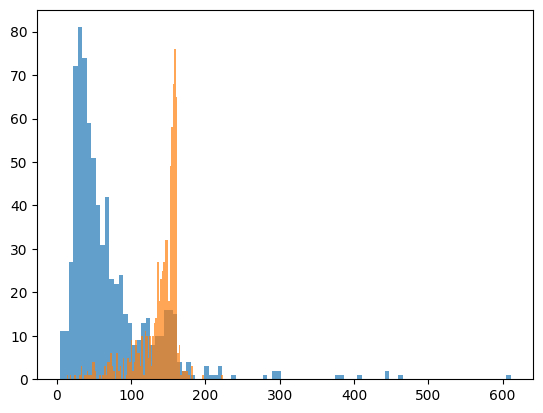

In [20]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

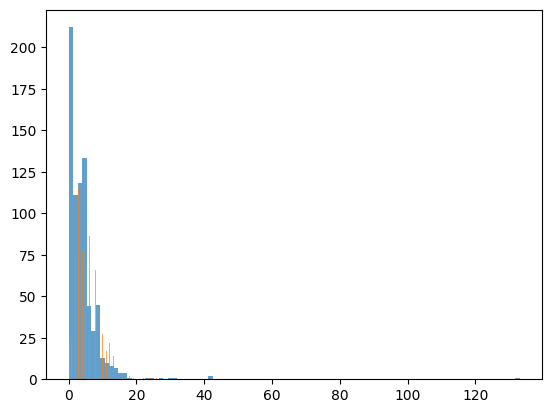

In [21]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)